## **Sistemas Bioinspirados - Tarea Nº 1** <img src="img/logo.png" align="right" style="width: 120px;"/>

**Magister en Inteligencia Artificial, Universidad Adolfo Ibáñez.**

- **Profesor:** Ricardo Contreras.
- **Alumnos:** Eduardo Carrasco / Gustavo Jara / Argenis Chirinos.

Enlace al repositorio del alumno en [GitHub](https://github.com/educarrascov/MIA_ReinforcementLearning)

![Python](https://img.shields.io/badge/python-%2314354C.svg) 

### Tópico específico: Algoritmos genéticos:

- **Objetivo de la tarea:** 
Mostrar el nivel de comprensión alcanzado en las clases, a partir de un ejemplo que considere los aspectos relevantes de los algoritmos genéticos.
- **Desarrollo de la tarea:** 
Grupal. 
- **Evaluación:** 
Escala de 1 a 7
- **Entrega de la tarea:** 
Hasta 28 de julio

### Criterios de evaluación:
1. Respecto de los resultados de aprendizaje:
    - a. Se comprenden cabalmente los componentes necesarios para el desarrollo de una solución.
    - b. Es posible identificar una aplicación
    - c. Existe una descripción del programa construido. La documentación es pertinente.    
2. Respecto de los logros:
    - a. Se aplican correctamente los criterios para determinar los parámetros típicos de una aplicación demostrativa.
    - b. Los resultados obtenidos son interpretados de manera crítica.
    - c. Las metas elegidas son realizables.
3. Calidad del informe:
    - a. Estructura (considerar Introducción, Antecedentes, Criterios principales de la solución).
    - b. Capacidad de síntesis.
    - c. Calidad de las conclusiones.
4. Ejecución correcta del programa

## Determinación de Ruta más corta en un track de navegación marítimo:

Se cuenta con la carta Nº 7000 del Servicio Hidrográfico y Oceanográfico de la Armada (SHOA) que permite la navegación por el área Sur desde Bahía Corral (Referencia Valdivia) hasta Boca del Guafo (Referencia Isla Guafo al Sur de Isla Chiloé).

En la siguiente figura, se muestra la Carta Nº 7000, donde cada cuadro negro representa el punto que indica la ruta comercial para dirigirse a parte de los puertos/canales/bahías de la Isla de Chiloé.

<img src="img/7000.jpg" align="left" style="width: 800px;"/>

Para lo anterior, se utilizó _Google Earth_, objeto determinar la posición GPS de cada punto (cuadrado negro) obteniendo un kml/csv que se almacenó como archivo **"PUNTO_PRUEBA".csv** del mismo root del notebook.

### I. Distancias determinadas por Google Earth en base a una ruta de navegación:

Utilizando el archivo generado anteriormente, determinaremos las distancias en millas Náuticas, tal como se utilizan en el ambiente marítimo.

In [106]:
import pandas
import pandas as pd
import numpy as np
df1 = pandas.read_csv('PUNTOS_PRUEBA.csv') #sep default pandas es coma.
print(df1)

            X          Y Name description
0  -72.921258 -41.490495   P1      PMontt
1  -72.828036 -41.694437   P2   Reloncavi
2  -73.016551 -41.961199   P3       Ancud
3  -72.993615 -42.273183   P4    Mechuque
4  -73.171205 -42.657329   P5  Desertores
5  -73.399562 -43.404184   P6     Quellon
6  -73.988938 -43.531862   P7        Inio
7  -74.742380 -43.513953   P8       Guafo
8  -74.274367 -42.826613   P9       Cucao
9  -74.236592 -42.177675  P10       Chepu
10 -74.124650 -41.699442  P11      Chacao
11 -73.260156 -41.864961  P12     Calbuco


In [107]:
#pip install geopy

#### Determinación de distancias usando GEOPY:
Se debe utilizar la librería `geopy`, objeto determinar de mejor manera las distancias.
En caso de no utilizar la librería descrita, se debe determinar la distancia utilizando la fórmula Harvesine, que se detalla a continuación:

$$d = 2 r \arcsin\left(\sqrt{\operatorname{hav}(\varphi_2 - \varphi_1) + \cos(\varphi_1) \cos(\varphi_2)\operatorname{hav}(\lambda_2-\lambda_1)}\right)$$

$$= 2 r \arcsin\left(\sqrt{\sin^2\left(\frac{\varphi_2 - \varphi_1}{2}\right) + \cos(\varphi_1) \cos(\varphi_2)\sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)}\right)$$

Considerar que la librería permite el cálculo de distancia en kilómetros, por lo cual, se debe dividir por 1.852 para obtener la tabla de distancias en millas náuticas.

In [127]:
import numpy as np
from geopy import distance
from geopy.distance import lonlat, distance
empty_matrix = np.zeros((12,12))
 
for i in range(12):
    for j in range(12):
        if i != j:
            #print(i,j,df2.iloc[i,1],df2.iloc[j,1],distance(lonlat(*df2.iloc[i,0:2]), 
            #lonlat(*df2.iloc[j,0:2])).km)
            empty_matrix[i,j] = ((distance(lonlat(*df1.iloc[i,0:2]), lonlat(*df1.iloc[j,0:2])).km)/1.852)

empty_matrix
df_2 = empty_matrix
df_mn = pd.DataFrame(df_2, columns = df1.iloc[:,2])# convertir NumPy Array a Pandas DF
df_mn.insert(0,'Name', df1.iloc[:,3])
df_mn1=round(df_mn,2)
df_mn1

Name,Name,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
0,PMontt,0.00,12.93,28.55,47.05,70.87,116.73,131.29,145.81,100.33,71.96,55.60,27.14
1,Reloncavi,12.93,0.00,18.10,35.49,59.75,105.64,121.62,138.22,93.61,69.41,58.28,21.93
2,Ancud,28.55,18.10,0.00,18.74,42.32,88.20,103.55,120.40,76.30,56.04,52.12,12.35
3,Mechuque,47.05,35.49,18.74,0.00,24.35,70.17,87.33,107.18,65.79,55.70,61.20,27.23
4,Desertores,70.87,59.75,42.32,24.35,0.00,45.91,63.59,86.09,49.82,55.40,71.48,47.69
5,Quellon,116.73,105.64,88.20,70.17,45.91,0.00,26.87,59.05,51.75,82.34,107.19,92.53
6,Inio,131.29,121.62,103.55,87.33,63.59,26.87,0.00,32.91,44.12,81.96,110.08,105.05
7,Guafo,145.81,138.22,120.40,107.18,86.09,59.05,32.91,0.00,46.07,83.21,112.22,118.68
8,Cucao,100.33,93.61,76.30,65.79,49.82,51.75,44.12,46.07,0.00,38.96,67.93,73.23
9,Chepu,71.96,69.41,56.04,55.70,55.40,82.34,81.96,83.21,38.96,0.00,29.12,47.52


Efectuado lo anterior, se genera un nuevo df objeto sea posicionado en follium.

In [109]:
GPSposition = {'Point Name': df1.iloc[:,2],
            'Latitude': df1.iloc[:,1],
            'Longitude': df1.iloc[:,0],
          'Description': df1.iloc[:,3]}
frame1 = pd.DataFrame(GPSposition)
frame1

,Point Name,Latitude,Longitude,Description
0,P1,-41.490495,-72.921258,PMontt
1,P2,-41.694437,-72.828036,Reloncavi
2,P3,-41.961199,-73.016551,Ancud
3,P4,-42.273183,-72.993615,Mechuque
4,P5,-42.657329,-73.171205,Desertores
5,P6,-43.404184,-73.399562,Quellon
6,P7,-43.531862,-73.988938,Inio
7,P8,-43.513953,-74.742380,Guafo
8,P9,-42.826613,-74.274367,Cucao
9,P10,-42.177675,-74.236592,Chepu


In [110]:
import geopandas
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

gdf = geopandas.GeoDataFrame(frame1.iloc[:,0:4], 
                             geometry=geopandas.points_from_xy(frame1.Longitude, frame1.Latitude))
print(gdf)

   Point Name   Latitude  Longitude Description                     geometry
0          P1 -41.490495 -72.921258      PMontt  POINT (-72.92126 -41.49049)
1          P2 -41.694437 -72.828036   Reloncavi  POINT (-72.82804 -41.69444)
2          P3 -41.961199 -73.016551       Ancud  POINT (-73.01655 -41.96120)
3          P4 -42.273183 -72.993615    Mechuque  POINT (-72.99361 -42.27318)
4          P5 -42.657329 -73.171205  Desertores  POINT (-73.17121 -42.65733)
5          P6 -43.404184 -73.399562     Quellon  POINT (-73.39956 -43.40418)
6          P7 -43.531862 -73.988938        Inio  POINT (-73.98894 -43.53186)
7          P8 -43.513953 -74.742380       Guafo  POINT (-74.74238 -43.51395)
8          P9 -42.826613 -74.274367       Cucao  POINT (-74.27437 -42.82661)
9         P10 -42.177675 -74.236592       Chepu  POINT (-74.23659 -42.17767)
10        P11 -41.699442 -74.124650      Chacao  POINT (-74.12465 -41.69944)
11        P12 -41.864961 -73.260156     Calbuco  POINT (-73.26016 -41.86496)

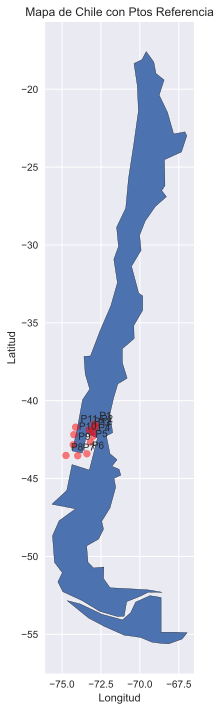

In [111]:
fig, gax = plt.subplots(figsize=(5,12))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.query("name == 'Chile'").plot(ax=gax, edgecolor='black')

gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Mapa de Chile con Ptos Referencia')

gax.spines['top'].set_visible(True)
gax.spines['right'].set_visible(True)

for x, y, label in zip(gdf['geometry'].x, gdf['geometry'].y, gdf['Point Name']):
    gax.annotate(label, xy=(x,y), xytext=(5,5), textcoords='offset points')

plt.show()

In [112]:
import folium
m = folium.Map(width=1000,height=400,location=[gdf.Latitude.mean(), 
                                               gdf.Longitude.mean()], zoom_start=7, min_zoom=3,max_zoom=100)
for index, location_info in gdf.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], 
                  popup=location_info["Description"]).add_to(m)
m

Como se observa en la imagen anterior los puntos fueron correctamente generados.
Al hacer click en cada uno de los puntos azules, se observa la informacion (descripción) relacionada a su posición geográfica.

### Resolución de distancia más corta a través de algoritmos geneticos:

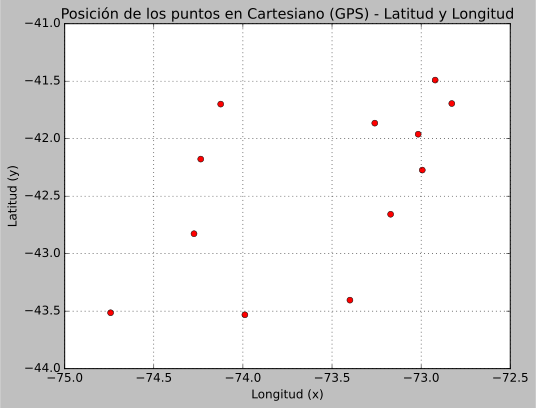

In [142]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.plot(gdf.iloc[:,2], gdf.iloc[:,1], marker="o", c="red", linestyle='')
ax.grid(True)
plt.style.use('classic')
ax.set_xlabel("Longitud (x)")
ax.set_ylabel("Latitud (y)")
ax.set_title("Posición de los puntos en Cartesiano (GPS) - Latitud y Longitud")
plt.show()

In [279]:
weights = df_mn1.iloc[0:13,1:13].to_numpy()
weights

array([[  0.  ,  12.93,  28.55,  47.05,  70.87, 116.73, 131.29, 145.81,
        100.33,  71.96,  55.6 ,  27.14],
       [ 12.93,   0.  ,  18.1 ,  35.49,  59.75, 105.64, 121.62, 138.22,
         93.61,  69.41,  58.28,  21.93],
       [ 28.55,  18.1 ,   0.  ,  18.74,  42.32,  88.2 , 103.55, 120.4 ,
         76.3 ,  56.04,  52.12,  12.35],
       [ 47.05,  35.49,  18.74,   0.  ,  24.35,  70.17,  87.33, 107.18,
         65.79,  55.7 ,  61.2 ,  27.23],
       [ 70.87,  59.75,  42.32,  24.35,   0.  ,  45.91,  63.59,  86.09,
         49.82,  55.4 ,  71.48,  47.69],
       [116.73, 105.64,  88.2 ,  70.17,  45.91,   0.  ,  26.87,  59.05,
         51.75,  82.34, 107.19,  92.53],
       [131.29, 121.62, 103.55,  87.33,  63.59,  26.87,   0.  ,  32.91,
         44.12,  81.96, 110.08, 105.05],
       [145.81, 138.22, 120.4 , 107.18,  86.09,  59.05,  32.91,   0.  ,
         46.07,  83.21, 112.22, 118.68],
       [100.33,  93.61,  76.3 ,  65.79,  49.82,  51.75,  44.12,  46.07,
          0.  ,  38.96, 

In [280]:
cities = df_mn1.iloc[0:13,0].to_numpy()
cities

array(['PMontt', 'Reloncavi', 'Ancud', 'Mechuque', 'Desertores',
       'Quellon', 'Inio', 'Guafo', 'Cucao', 'Chepu', 'Chacao', 'Calbuco'],
      dtype=object)

In [281]:
cities = np.asarray(cities)
adjacency_mat = np.asarray(weights)

In [282]:
#!pip install deap

In [283]:
#!pip install seaborn

In [284]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

%matplotlib inline

In [285]:
gdf.iloc[:,1:3].to_numpy()

array([[-41.49049462, -72.92125833],
       [-41.69443731, -72.82803562],
       [-41.96119885, -73.01655053],
       [-42.27318324, -72.99361488],
       [-42.65732895, -73.17120507],
       [-43.40418423, -73.39956226],
       [-43.53186176, -73.98893758],
       [-43.5139534 , -74.74238009],
       [-42.82661294, -74.27436715],
       [-42.17767466, -74.2365921 ],
       [-41.69944152, -74.12464987],
       [-41.86496086, -73.2601562 ]])

In [286]:
plot_size   = 10
plot_width  = 6
plot_height = 8

params = {'legend.fontsize': 'large',
          'figure.figsize': (plot_width,plot_height),
          'axes.labelsize': plot_size,
          'axes.titlesize': plot_size,
          'xtick.labelsize': plot_size*0.75,
          'ytick.labelsize': plot_size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.rcParams.update(params)

In [316]:
num_homes = 12
homes_names = [i for i in range(num_homes)]

In [305]:
homes_coord = abs(gdf.iloc[:,1:3].to_numpy())

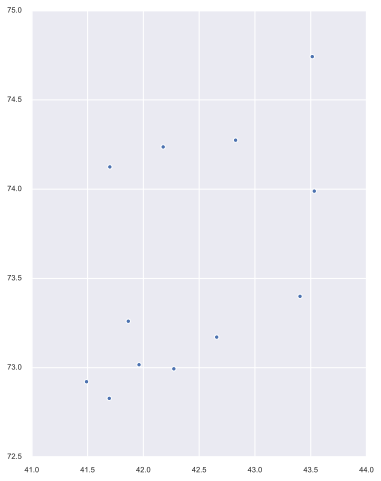

In [321]:
plt.scatter(homes_coord[:, 0], homes_coord[:, 1], s=plot_size*2, cmap='cividis');

In [307]:
from scipy.spatial import distance

dist_matrix = df_mn1.iloc[0:13,1:13].to_numpy()

In [308]:
from deap import base, creator, tools

In [309]:
import copy

np.random.seed(3)  # we are setting the same random seed to be able to reproduce the answers.

def chromo_create(_homes_names):
    chromo = copy.deepcopy(_homes_names)
    np.random.shuffle(chromo)    
    return chromo

In [310]:
def chromo_eval(_dist_matrix, _chromo):
    dist = 0
    for p in range(len(_chromo) - 1):
        _i = _chromo[p]
        _j = _chromo[p+1]
        dist += _dist_matrix[_i][_j]
        
    dist += dist_matrix[_chromo[-1], _chromo[0]]
    return dist,

In [311]:
tb = base.Toolbox()
creator.create('Fitness_Func', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.Fitness_Func)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Fitness_Func' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [312]:
num_population = 200
num_generations = 1000
prob_crossover = .4
prob_mutation = .6

In [313]:
tb.register('indexes', chromo_create, homes_names)
tb.register('individual', tools.initIterate, creator.Individual, tb.indexes)
tb.register('population', tools.initRepeat, list, tb.individual)
tb.register('evaluate', chromo_eval, dist_matrix)
tb.register('select', tools.selTournament)
tb.register('mate', tools.cxPartialyMatched)
tb.register('mutate', tools.mutShuffleIndexes)

In [314]:
population = tb.population(n=num_population)

In [315]:
fitness_set = list(tb.map(tb.evaluate, population))
for ind, fit in zip(population, fitness_set):
    ind.fitness.values = fit

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [300]:
best_fit_list = []
best_sol_list = []

best_fit = np.Inf

for gen in range(0, num_generations):
    
    if (gen % 50 == 0):
        print(f'Generation: {gen:4} | Fitness: {best_fit:.2f}' )   # print the generation and their fitness level
    
    offspring = tb.select(population, len(population), tournsize=3)
    offspring = list(map(tb.clone, offspring))
    
    for child1, child2 in zip(offspring[0::2], offspring[1::2]):
        if np.random.random() < prob_crossover:
            tb.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for chromo in offspring:
        if np.random.random() < prob_mutation:
            tb.mutate(chromo, indpb=0.01)
            del chromo.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitness_set = map(tb.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitness_set):
        ind.fitness.values = fit
    
    population[:] = offspring
    
    curr_best_sol = tools.selBest(population, 1)[0]
    curr_best_fit = curr_best_sol.fitness.values[0]
    
    if curr_best_fit < best_fit:
        best_sol = curr_best_sol
        best_fit = curr_best_fit

    best_fit_list.append(best_fit)
    best_sol_list.append(best_sol)

Generation:    0 | Fitness: inf
Generation:   50 | Fitness: 361.15
Generation:  100 | Fitness: 361.15
Generation:  150 | Fitness: 361.15
Generation:  200 | Fitness: 361.15
Generation:  250 | Fitness: 361.15
Generation:  300 | Fitness: 361.15
Generation:  350 | Fitness: 361.15
Generation:  400 | Fitness: 361.15
Generation:  450 | Fitness: 361.15
Generation:  500 | Fitness: 361.15
Generation:  550 | Fitness: 361.15
Generation:  600 | Fitness: 361.15
Generation:  650 | Fitness: 361.15
Generation:  700 | Fitness: 361.15
Generation:  750 | Fitness: 361.15
Generation:  800 | Fitness: 361.15
Generation:  850 | Fitness: 361.15
Generation:  900 | Fitness: 361.15
Generation:  950 | Fitness: 361.15


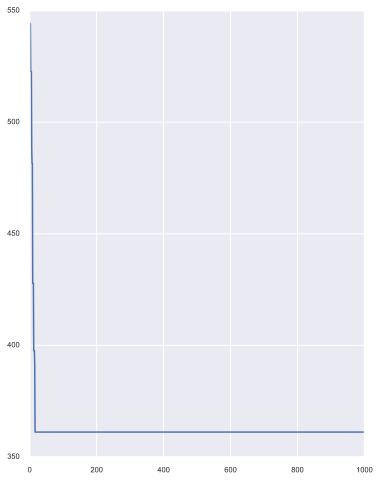

In [301]:
plt.plot(best_fit_list)
plt.show()

In [302]:
print(best_sol)

[4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3]


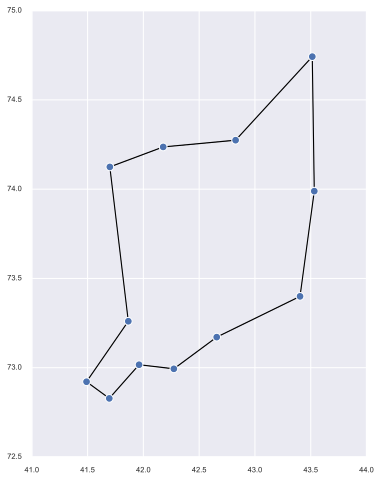

In [320]:
final_sol = best_sol + best_sol[0:1]

plt.scatter(homes_coord[:, 0], 
            homes_coord[:, 1], 
            s=plot_size*6, 
            cmap='cividis',
            zorder = 10000);

lines = []
for p in range(len(final_sol) - 1):
    i = final_sol[p]
    j = final_sol[p+1]
    colour = 'black'       
    plt.arrow(homes_coord[i][0], 
              homes_coord[i][1],
              homes_coord[j][0] - homes_coord[i][0], 
              homes_coord[j][1] - homes_coord[i][1], 
              color=colour)